In [8]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import cv2
import sys
import os
import copy

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

In [9]:
color_raw_0 = o3d.io.read_image('./dataset/realsense/color/img.png')
depth_raw_0 = o3d.io.read_image('./dataset/realsense/depth/dpt.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw_0, depth_raw_0, depth_scale=1000.0)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [10]:
# Camera intrinsic parameters built into Open3D for Prime Sense
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [11]:
# User camera calibration
w0 = 2480
h0 = 2048
fx0 = 3.5328165492807593e+03
fy0 = 3.5328165492807593e+03
cx0 = 1.2430728721263897e+03
cy0 = 1.0791315427446541e+03
intrinsic_0 = o3d.camera.PinholeCameraIntrinsic(w0, h0, fx0, fy0, cx0, cy0)
print(intrinsic_0.intrinsic_matrix)

[[3.53281655e+03 0.00000000e+00 1.24307287e+03]
 [0.00000000e+00 3.53281655e+03 1.07913154e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


calculate the point cloud from image and depth map example
[link](https://betterprogramming.pub/point-cloud-computing-from-rgb-d-images-918414d57e80) 

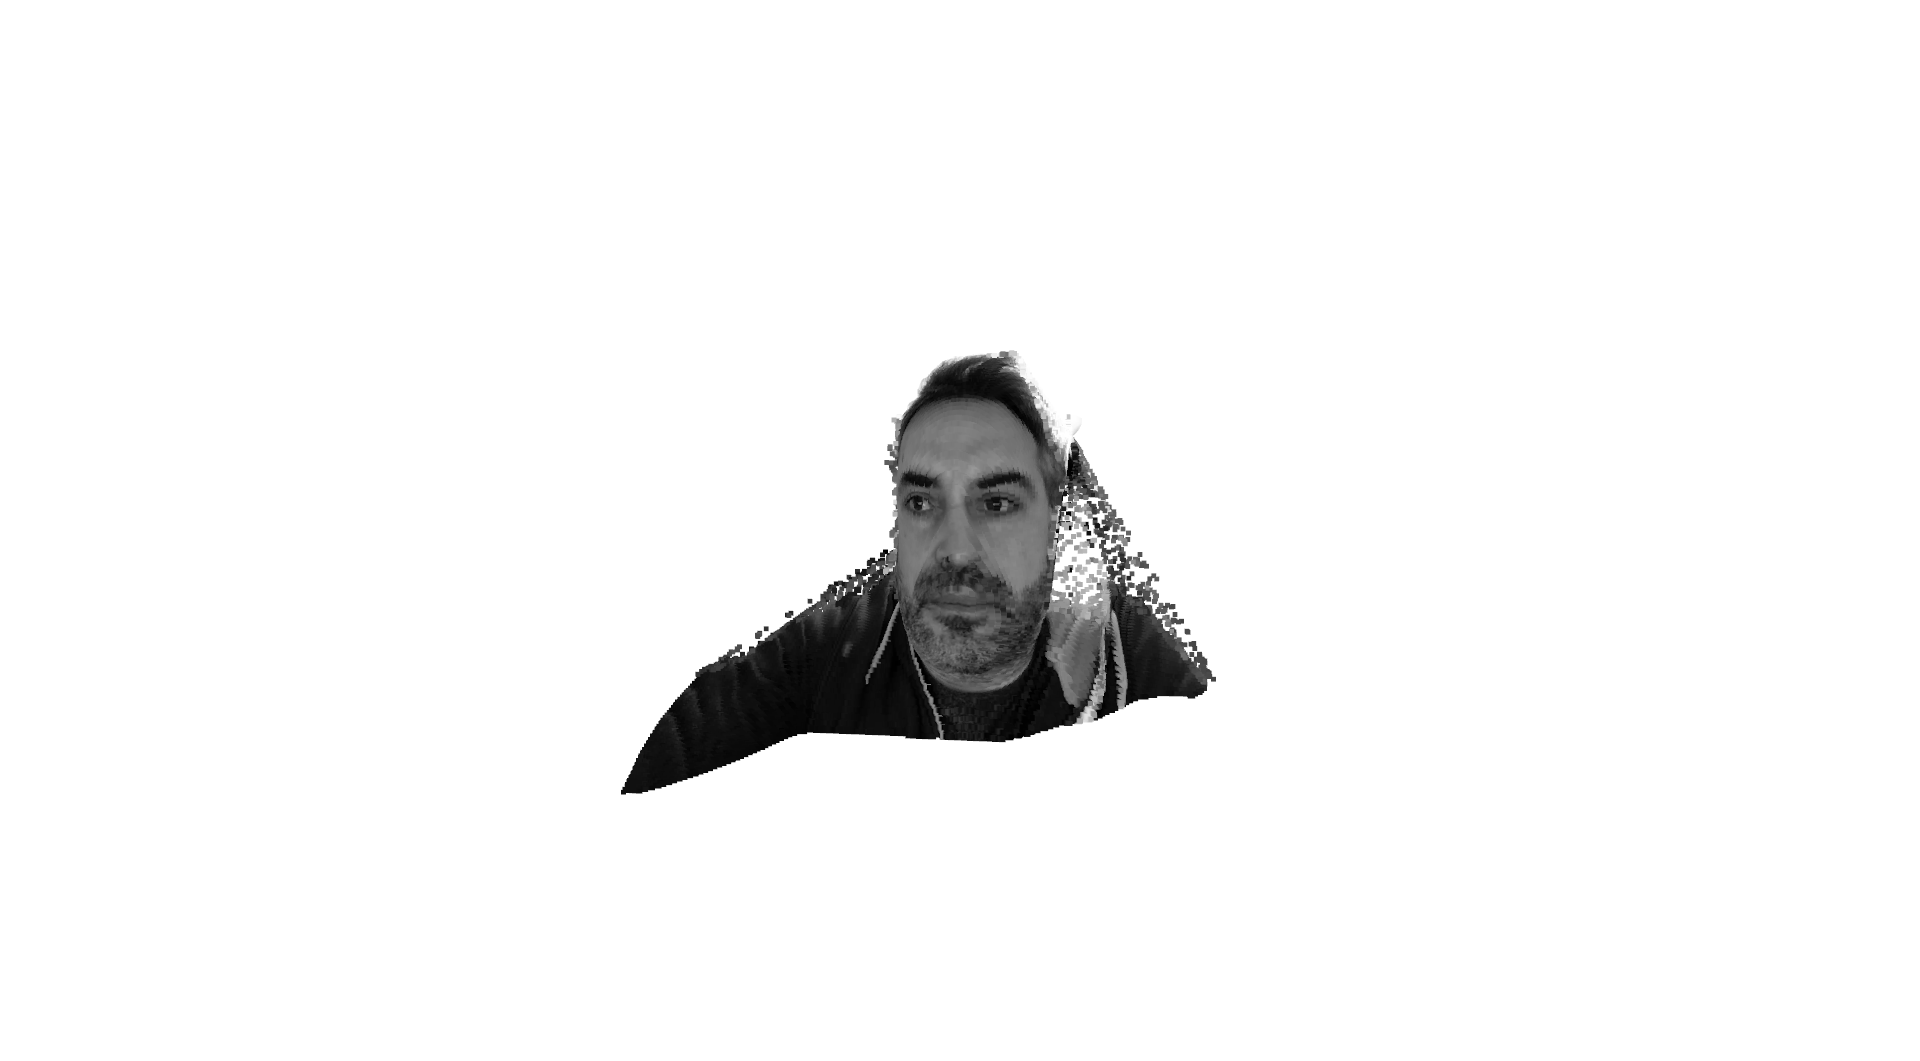

In [13]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=1)